In [149]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier

!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import plotDecisionTree, regressionSummary, classificationSummary, liftChart, gainsChart, adjusted_r2_score, exhaustive_search, backward_elimination, forward_selection, AIC_score, BIC_score

In [46]:
KSI = pd.read_csv('KSI.csv')

#Data cleaning for KSI-Drivers

In [47]:
KSI_d = KSI.loc[:,['ACCLASS','INVTYPE','SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY']]
KSI_d

,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,Fatal,Driver,<Null>,Yes,<Null>,<Null>,<Null>
1,Fatal,Pedestrian,<Null>,Yes,<Null>,<Null>,<Null>
2,Fatal,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>
3,Fatal,Driver,<Null>,Yes,Yes,<Null>,<Null>
4,Fatal,Driver,<Null>,<Null>,<Null>,Yes,<Null>
...,...,...,...,...,...,...,...
16855,Non-Fatal Injury,Cyclist,<Null>,Yes,<Null>,<Null>,<Null>
16856,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16857,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16858,Non-Fatal Injury,Passenger,<Null>,Yes,<Null>,<Null>,<Null>


In [48]:
KSI_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ACCLASS     16860 non-null  object
 1   INVTYPE     16860 non-null  object
 2   SPEEDING    16860 non-null  object
 3   AG_DRIV     16860 non-null  object
 4   REDLIGHT    16860 non-null  object
 5   ALCOHOL     16860 non-null  object
 6   DISABILITY  16860 non-null  object
dtypes: object(7)
memory usage: 922.2+ KB


In [49]:
objdtype_cols = KSI_d.select_dtypes(["object"]).columns
KSI_d[objdtype_cols] = KSI_d[objdtype_cols].astype('category')

In [50]:
driver = KSI_d[KSI_d['INVTYPE'].str.contains('Driver')]
driver

,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,Fatal,Driver,<Null>,Yes,<Null>,<Null>,<Null>
2,Fatal,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>
3,Fatal,Driver,<Null>,Yes,Yes,<Null>,<Null>
4,Fatal,Driver,<Null>,<Null>,<Null>,Yes,<Null>
7,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,Yes,<Null>
...,...,...,...,...,...,...,...
16853,Non-Fatal Injury,Motorcycle Driver,<Null>,Yes,<Null>,<Null>,<Null>
16854,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16856,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16857,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>


In [51]:
driver['ACCLASS'] = np.where(driver['ACCLASS'].str.contains('Non-Fatal'), 0, 1)
driver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,1,Driver,<Null>,Yes,<Null>,<Null>,<Null>
2,1,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>
3,1,Driver,<Null>,Yes,Yes,<Null>,<Null>
4,1,Driver,<Null>,<Null>,<Null>,Yes,<Null>
7,0,Driver,<Null>,Yes,<Null>,Yes,<Null>
...,...,...,...,...,...,...,...
16853,0,Motorcycle Driver,<Null>,Yes,<Null>,<Null>,<Null>
16854,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16856,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>
16857,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>


#Decision Tree & Random Forests

In [142]:
X = pd.get_dummies(driver.drop(columns=['ACCLASS','INVTYPE']), drop_first=True)
y = driver['ACCLASS']

In [143]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [144]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

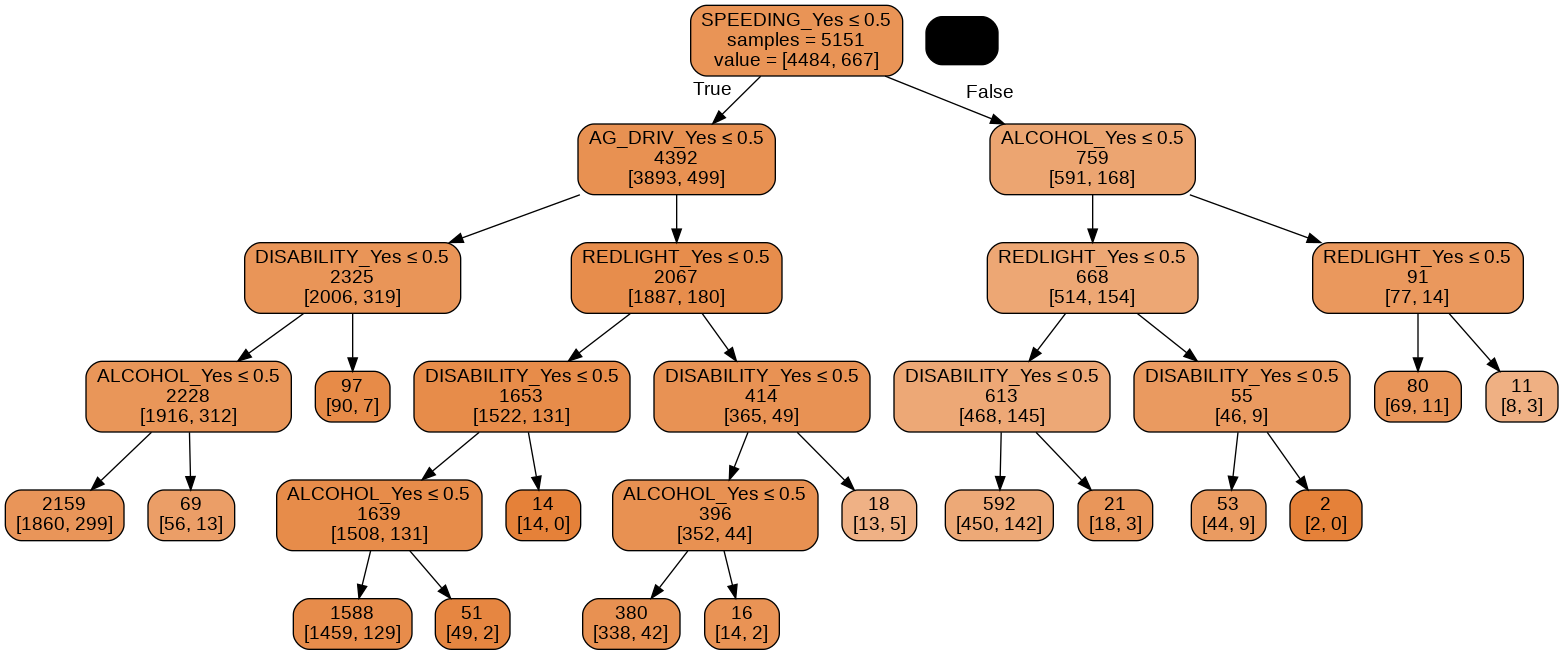

In [145]:
plotDecisionTree(fullClassTree,feature_names=train_X.columns)

In [163]:
classificationSummary(valid_y,fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8762)

       Prediction
Actual    0    1
     0 3009    0
     1  425    0


In [52]:
X = pd.get_dummies(driver.drop(columns=['ACCLASS','INVTYPE']), drop_first=True)
y = driver['ACCLASS']

In [53]:
X

,SPEEDING_Yes,AG_DRIV_Yes,REDLIGHT_Yes,ALCOHOL_Yes,DISABILITY_Yes
0,0,1,0,0,0
2,0,1,1,0,0
3,0,1,1,0,0
4,0,0,0,1,0
7,0,1,0,1,0
...,...,...,...,...,...
16853,0,1,0,0,0
16854,0,1,0,0,0
16856,0,1,0,0,0
16857,0,1,0,0,0


In [68]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [69]:
rf = RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [70]:
importance = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [71]:
df = pd.DataFrame({'feature': train_X.columns,
                   'importance': importance,
                   'std':std})
print(df.sort_values('importance', ascending=False))

          feature  importance       std
0    SPEEDING_Yes    0.619154  0.136917
1     AG_DRIV_Yes    0.164501  0.110700
2    REDLIGHT_Yes    0.078820  0.057523
4  DISABILITY_Yes    0.070540  0.053554
3     ALCOHOL_Yes    0.066986  0.050046


Text(0.5, 1.0, 'Visualizing Importance Features')

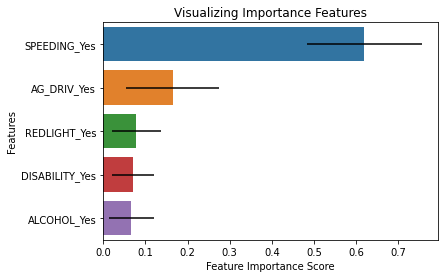

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_imp=pd.Series(rf.feature_importances_,index=train_X.columns).sort_values(ascending=False)
std=np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
sns.barplot(x = feature_imp, y=feature_imp.index, xerr = std)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')

In [73]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8762)

       Prediction
Actual    0    1
     0 3009    0
     1  425    0


In [74]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [75]:
logit_reg.intercept_

array([-1.81772305])

In [76]:
logit_reg.coef_

array([[ 1.1491441 , -0.58100362,  0.27818024, -0.19488787, -0.43349922]])

In [77]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                    coef
SPEEDING_Yes    1.149144
AG_DRIV_Yes    -0.581004
REDLIGHT_Yes    0.278180
ALCOHOL_Yes    -0.194888
DISABILITY_Yes -0.433499


In [78]:
logit_reg_prob = logit_reg.predict_proba(valid_X)
logit_reg_pred = logit_reg.predict(valid_X)

In [79]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
6798,0,0.892884,0.107116,0
6549,0,0.777228,0.222772,0
11766,0,0.892884,0.107116,0
14066,0,0.860293,0.139707,0
13096,0,0.860293,0.139707,0
...,...,...,...,...
10370,0,0.809146,0.190854,0
9824,0,0.892884,0.107116,0
3793,0,0.860293,0.139707,0
4604,0,0.904756,0.095244,0


In [80]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8705)

       Prediction
Actual    0    1
     0 4484    0
     1  667    0


In [81]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8762)

       Prediction
Actual    0    1
     0 3009    0
     1  425    0


#KSI- Road Conditions Logistic Regression

In [124]:
KSI_RC = KSI.loc[:,['ACCLASS','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND']]
KSI_RC

,ACCLASS,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND
0,Fatal,Traffic Signal,Clear,Daylight,Dry
1,Fatal,Traffic Signal,Clear,Daylight,Dry
2,Fatal,Traffic Signal,Clear,Daylight,Dry
3,Fatal,Traffic Signal,Clear,Daylight,Dry
4,Fatal,No Control,Clear,Dark,Dry
...,...,...,...,...,...
16855,Non-Fatal Injury,No Control,Clear,Daylight,Dry
16856,Non-Fatal Injury,Traffic Signal,Clear,Daylight,Dry
16857,Non-Fatal Injury,Traffic Signal,Clear,Daylight,Dry
16858,Non-Fatal Injury,Traffic Signal,Clear,Daylight,Dry


In [125]:
objdtype_cols = KSI_RC.select_dtypes(["object"]).columns
KSI_RC[objdtype_cols] = KSI_RC[objdtype_cols].astype('category')

In [126]:
KSI_RC['ACCLASS'] = np.where(KSI_RC['ACCLASS'].str.contains('Non-Fatal'), 0, 1)
KSI_RC

,ACCLASS,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND
0,1,Traffic Signal,Clear,Daylight,Dry
1,1,Traffic Signal,Clear,Daylight,Dry
2,1,Traffic Signal,Clear,Daylight,Dry
3,1,Traffic Signal,Clear,Daylight,Dry
4,1,No Control,Clear,Dark,Dry
...,...,...,...,...,...
16855,0,No Control,Clear,Daylight,Dry
16856,0,Traffic Signal,Clear,Daylight,Dry
16857,0,Traffic Signal,Clear,Daylight,Dry
16858,0,Traffic Signal,Clear,Daylight,Dry


In [128]:
X = pd.get_dummies(KSI_RC.drop(columns='ACCLASS'), drop_first=True)
y = KSI_RC['ACCLASS']

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [129]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [130]:
logit_reg.intercept_

array([2.07313483])

In [131]:
logit_reg.coef_

array([[  8.06161801,   8.1214461 ,   0.        ,  -0.37249388,
          7.84479481,  -0.92844736,  -3.00596407,  10.7160879 ,
          7.81948137,  -1.46814667,  -5.0709999 , -10.59125655,
         -4.68495211, -11.69008294,  -3.82905872,  -5.46117   ,
         -5.98177816,  -9.8370092 ,  -0.2230676 ,   0.14492206,
          0.41069938,  -0.41460315,  -0.56403825,   0.15420954,
         -0.55264858,  -0.58057022,  -6.50644798,  -6.88256141,
        -11.03964717,  -6.5343482 ,  -5.60016315,  -5.0523139 ,
         -6.77453986,  -9.80494351,  -6.35044845]])

In [132]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                        coef
TRAFFCTL_No Control                 8.061618
TRAFFCTL_Pedestrian Crossover       8.121446
TRAFFCTL_Police Control             0.000000
TRAFFCTL_School Guard              -0.372494
TRAFFCTL_Stop Sign                  7.844795
TRAFFCTL_Streetcar (Stop for)      -0.928447
TRAFFCTL_Traffic Controller        -3.005964
TRAFFCTL_Traffic Gate              10.716088
TRAFFCTL_Traffic Signal             7.819481
TRAFFCTL_Yield Sign                -1.468147
VISIBILITY_Clear                   -5.071000
VISIBILITY_Drifting Snow          -10.591257
VISIBILITY_Fog, Mist, Smoke, Dust  -4.684952
VISIBILITY_Freezing Rain          -11.690083
VISIBILITY_Other                   -3.829059
VISIBILITY_Rain                    -5.461170
VISIBILITY_Snow                    -5.981778
VISIBILITY_Strong wind             -9.837009
LIGHT_Dark, artificial             -0.223068
LIGHT_Dawn                          0.144922
LIGHT_Dawn, artificial              0.410699
LIGHT_Dayl

In [133]:
logit_reg_prob = logit_reg.predict_proba(valid_X)
logit_reg_pred = logit_reg.predict(valid_X)

In [134]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
15374,1,0.890848,0.109152,0
7768,0,0.808872,0.191128,0
4280,0,0.808872,0.191128,0
5834,0,0.890848,0.109152,0
15962,1,0.890848,0.109152,0
...,...,...,...,...
12989,0,0.888362,0.111638,0
13328,0,0.864982,0.135018,0
5265,0,0.890848,0.109152,0
1735,0,0.911622,0.088378,0


In [135]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8652)

       Prediction
Actual    0    1
     0 8711   12
     1 1352   41


In [136]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8676)

       Prediction
Actual    0    1
     0 5832    6
     1  887   19


#ALL

In [164]:
KSI_drc = KSI.loc[:,['ACCLASS','INVTYPE','SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND']]
KSI_drc

,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND
0,Fatal,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
1,Fatal,Pedestrian,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
2,Fatal,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
3,Fatal,Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
4,Fatal,Driver,<Null>,<Null>,<Null>,Yes,<Null>,No Control,Clear,Dark,Dry
...,...,...,...,...,...,...,...,...,...,...,...
16855,Non-Fatal Injury,Cyclist,<Null>,Yes,<Null>,<Null>,<Null>,No Control,Clear,Daylight,Dry
16856,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16857,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16858,Non-Fatal Injury,Passenger,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry


In [165]:
objdtype_cols = KSI_drc.select_dtypes(["object"]).columns
KSI_drc[objdtype_cols] = KSI_drc[objdtype_cols].astype('category')

In [166]:
KSI_drc = KSI_drc[KSI_d['INVTYPE'].str.contains('Driver')]
KSI_drc

,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND
0,Fatal,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
2,Fatal,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
3,Fatal,Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
4,Fatal,Driver,<Null>,<Null>,<Null>,Yes,<Null>,No Control,Clear,Dark,Dry
7,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,Yes,<Null>,Traffic Signal,Clear,Dark,Dry
...,...,...,...,...,...,...,...,...,...,...,...
16853,Non-Fatal Injury,Motorcycle Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16854,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>,No Control,Clear,Daylight,Dry
16856,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16857,Non-Fatal Injury,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry


In [167]:
KSI_drc['ACCLASS'] = np.where(KSI_drc['ACCLASS'].str.contains('Non-Fatal'), 0, 1)
KSI_drc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ACCLASS,INVTYPE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND
0,1,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
2,1,Motorcycle Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
3,1,Driver,<Null>,Yes,Yes,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
4,1,Driver,<Null>,<Null>,<Null>,Yes,<Null>,No Control,Clear,Dark,Dry
7,0,Driver,<Null>,Yes,<Null>,Yes,<Null>,Traffic Signal,Clear,Dark,Dry
...,...,...,...,...,...,...,...,...,...,...,...
16853,0,Motorcycle Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16854,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>,No Control,Clear,Daylight,Dry
16856,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry
16857,0,Driver,<Null>,Yes,<Null>,<Null>,<Null>,Traffic Signal,Clear,Daylight,Dry


In [170]:
X = pd.get_dummies(KSI_drc.drop(columns=['ACCLASS','INVTYPE']), drop_first=True)
y = KSI_drc['ACCLASS']

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [171]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [172]:
logit_reg.intercept_

array([2.05493192])

In [173]:
logit_reg.coef_

array([[  1.11445402,  -0.56145253,   0.36268336,  -0.34913964,
         -0.35070872,   8.45643489,   8.41551873,  -0.17434462,
          0.        ,   8.27785961,  -0.40438867,  -2.92719356,
          0.        ,   8.27781782,  -0.42326617,  -4.71168576,
        -10.4250747 ,  -5.62685195,  -9.79213217,  -2.9267068 ,
         -4.94534755,  -5.17126816,  -7.55344582,  -0.31226613,
          0.02468068,   0.5988573 ,  -0.39422408,   0.25133615,
         -0.02147567,  -0.47565596,   1.90873152,  -7.25341869,
        -13.4562088 , -12.89727375,  -7.85106666,  -6.15155661,
         -6.43362671,  -8.5810342 ,   0.        ,  -7.23619397]])

In [174]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                        coef
SPEEDING_Yes                        1.114454
AG_DRIV_Yes                        -0.561453
REDLIGHT_Yes                        0.362683
ALCOHOL_Yes                        -0.349140
DISABILITY_Yes                     -0.350709
TRAFFCTL_No Control                 8.456435
TRAFFCTL_Pedestrian Crossover       8.415519
TRAFFCTL_Police Control            -0.174345
TRAFFCTL_School Guard               0.000000
TRAFFCTL_Stop Sign                  8.277860
TRAFFCTL_Streetcar (Stop for)      -0.404389
TRAFFCTL_Traffic Controller        -2.927194
TRAFFCTL_Traffic Gate               0.000000
TRAFFCTL_Traffic Signal             8.277818
TRAFFCTL_Yield Sign                -0.423266
VISIBILITY_Clear                   -4.711686
VISIBILITY_Drifting Snow          -10.425075
VISIBILITY_Fog, Mist, Smoke, Dust  -5.626852
VISIBILITY_Freezing Rain           -9.792132
VISIBILITY_Other                   -2.926707
VISIBILITY_Rain                    -4.945348
VISIBILITY

In [176]:
logit_reg_prob = logit_reg.predict_proba(valid_X)
logit_reg_pred = logit_reg.predict(valid_X)

In [177]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
6798,0,0.900977,0.099023,0
6549,0,0.784986,0.215014,0
11766,0,0.902503,0.097497,0
14066,0,0.863888,0.136112,0
13096,0,0.873182,0.126818,0
...,...,...,...,...
10370,0,0.777278,0.222722,0
9824,0,0.902503,0.097497,0
3793,0,0.883555,0.116445,0
4604,0,0.954362,0.045638,0


In [178]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8774)

       Prediction
Actual    0    1
     0 3002    7
     1  414   11
